<a href="https://colab.research.google.com/github/navneetslovely/Wifi_RSSI_localization/blob/main/RSSI_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
fetch_training_sample= '/content/drive/My Drive/UJIndoorLoc/UJIndoorLoc/trainingData.csv'
fetch_validation_sample= '/content/drive/My Drive/UJIndoorLoc/UJIndoorLoc/validationData.csv'

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
training_data = pd.read_csv(fetch_training_sample)
validation_data = pd.read_csv(fetch_validation_sample)
# print(training_data)
# print(validation_data)

In [24]:
df= pd.DataFrame(data=training_data)
df1 = pd.DataFrame(data=validation_data)
df['BUILDINGID']=df.BUILDINGID.astype(str)
df1['BUILDINGID']=df.BUILDINGID.astype(str)
df['FLOOR']=df.FLOOR.astype(str)
df1['FLOOR']=df.FLOOR.astype(str)
df['newfeature'] = df[['BUILDINGID', 'FLOOR']].apply(lambda x: '.'.join(x), axis=1)
df[['newfeature']] = df[['newfeature']].apply(pd.to_numeric) 
df1['newfeature'] = df[['BUILDINGID', 'FLOOR']].apply(lambda x: '.'.join(x), axis=1)
df1[['newfeature']] = df1[['newfeature']].apply(pd.to_numeric) 
modified_training_data = pd.concat([df,df1], ignore_index=True)
modified_training_data['newfeature']=1000*modified_training_data['newfeature']
modified_training_data['newfeature'] = modified_training_data['newfeature'].astype(int) 


In [25]:
x_modified_training_data = modified_training_data.drop(columns=['LONGITUDE',"LATITUDE", "FLOOR", "BUILDINGID", "SPACEID", "RELATIVEPOSITION", "USERID", "PHONEID", "TIMESTAMP", "newfeature"])
y_modified_training_data = modified_training_data.loc[:,['LONGITUDE',"LATITUDE", "FLOOR", "BUILDINGID", "SPACEID","newfeature"]]

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(x_modified_training_data,y_modified_training_data, test_size= 0.33,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
**************************
*

Text(0, 0.5, 'Mean Error')

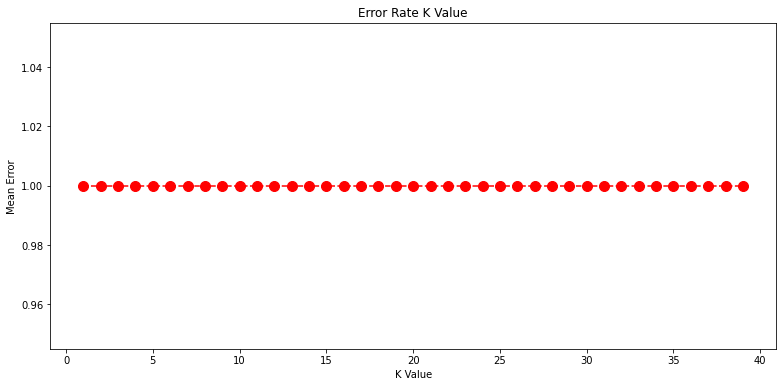

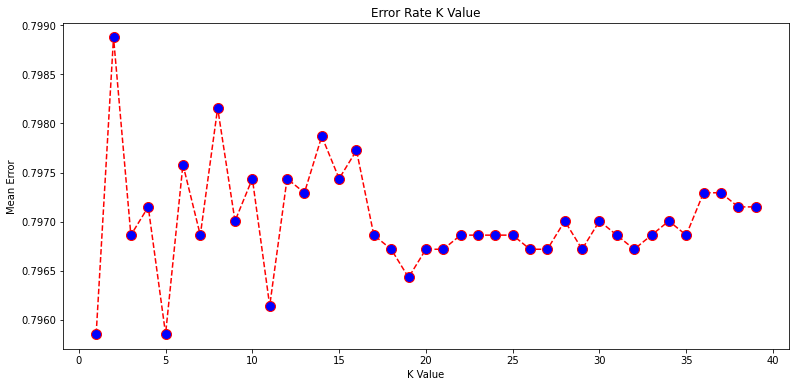

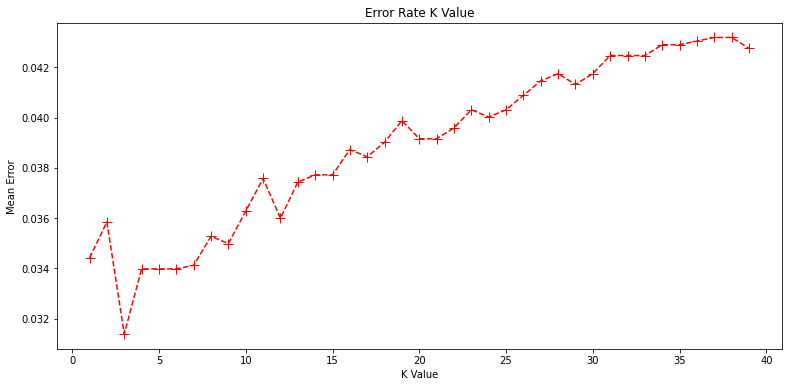

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model
from sklearn import svm
import matplotlib.pyplot as plt



# classifier = KNeighborsClassifier(n_neighbors=)
# classifier.fit(X_train, Y_train['newfeature'])
# y_pred = classifier.predict(X_test)
# print(confusion_matrix(Y_test['newfeature'], y_pred),"new combined feature \n")
# print(classification_report(Y_test['newfeature'], y_pred),"new combined feature \n")

# knn = KNeighborsClassifier(n_neighbors=1)
# knn.fit(X_train, Y_train['FLOOR'])
# knn.fit(X_train, Y_train['BUILDINGID'])
# pred_i = knn.predict(X_test)

# print(confusion_matrix(Y_test['FLOOR'], pred_i),"FLOOR \n")
# print(classification_report(Y_test['FLOOR'], pred_i),"FLOOR\n")
# print(confusion_matrix(Y_test['BUILDINGID'], pred_i),"BUILDINGID \n")
# print(classification_report(Y_test['BUILDINGID'], pred_i),"BUILDINGID\n")


error_newfeature = []

error = []

error_building = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train['newfeature'])
    knn.fit(X_train, Y_train['FLOOR'])
    knn.fit(X_train, Y_train['BUILDINGID'])
    pred_i = knn.predict(X_test)
    # print(confusion_matrix(Y_test['newfeature'], pred_i))
    # print(classification_report(Y_test['newfeature'], pred_i))
    error_newfeature.append(np.mean(pred_i != Y_test['newfeature']))
   
    error.append(np.mean(pred_i != Y_test['FLOOR']))
    # print(confusion_matrix(Y_test['FLOOR'], pred_i))
    # print(classification_report(Y_test['FLOOR'], pred_i))
    
    error_building.append(np.mean(pred_i != Y_test['BUILDINGID']))
    # print(confusion_matrix(Y_test['BUILDINGID'], pred_i))
    # print(classification_report(Y_test['BUILDINGID'], pred_i))
print("**************************")
plt.figure(figsize=(13, 6))
plt.plot(range(1, 40), error_newfeature, color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate K Value for building with floor')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("**************************")
plt.figure(figsize=(13, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value for floor')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("**************************")
plt.figure(figsize=(13, 6))
plt.plot(range(1,40), error_building, color='red', linestyle='dashed', marker='+',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value for building')
plt.xlabel('K Value')
plt.ylabel('Mean Error')




# error=[]
# error_LONG=[]
# error_LAT=[]
# classifiers = [
#     svm.SVR(),
#     linear_model.SGDRegressor(),
#     linear_model.BayesianRidge(),
#     linear_model.LassoLars(),
#     # linear_model.ARDRegression(),
#     # linear_model.PassiveAggressiveRegressor(),
#     # linear_model.TheilSenRegressor(),
#     linear_model.LinearRegression()
#     ]


# for item in classifiers:
#     print(item)
#     clf = item
#     # clf.fit(X_train, Y_train['FLOOR'])
#     # clf.fit(X_train, Y_train['BUILDINGID'])
#     clf.fit(X_train, Y_train['newfeature'])
#     clf.fit(X_train, Y_train['LONGITUDE'])
#     clf.fit(X_train, Y_train['LATITUDE'])
#     y_pred=clf.predict(X_test)
#     print(y_pred)
#     error.append(np.mean(y_pred != Y_test['newfeature']))
#     print(error, "newfeature error \n")
#     error_LONG.append(np.mean(y_pred != Y_test['LONGITUDE']))
#     print(error_LONG, "longitute error \n")
#     error_LAT.append(np.mean(y_pred != Y_test['LATITUDE']))
#     print(error_LAT, "latitude error \n")
    # y_pred = classifier.predict(X_test)
    # print(confusion_matrix(Y_test['newfeature'], y_pred))
    # print(classification_report(Y_test['newfeature'], y_pred))
    # plt.plot(y_pred, error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)

In [ ]:
plt.plot(range(1, 40), error_newfeature, color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

Text(0, 0.5, 'Mean Error')

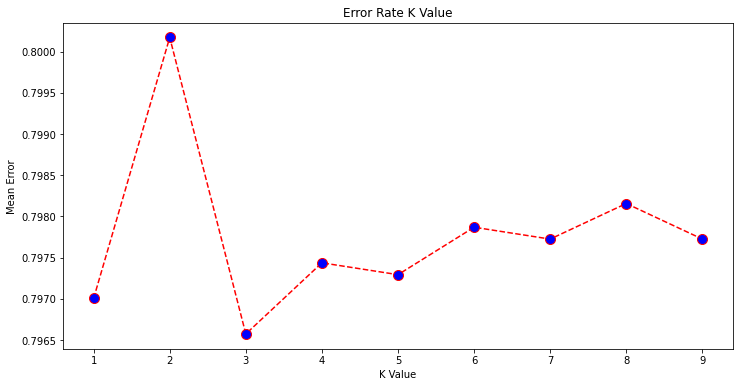

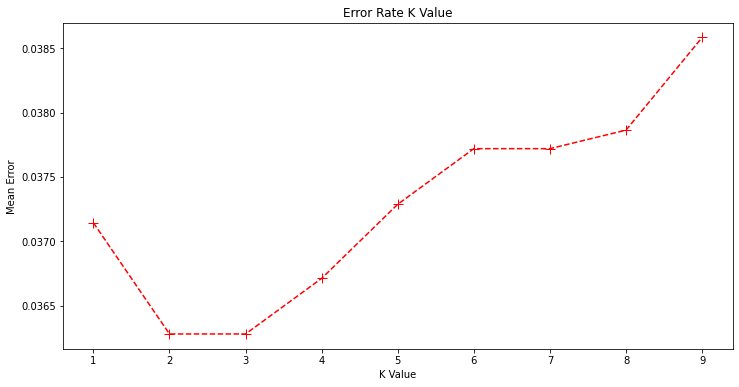

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error_building, color='red', linestyle='dashed', marker='+',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')